##### Name - Shunottara Alhat

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
------------------------------------------------------------
## 1) Delivery_time -> Predict delivery time using sorting time 

### Import the Dataset

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import pylab
import scipy.stats as st

In [308]:
# Read the Data

DeliveryTime = pd.read_csv("D:\Excelr DataScience\DS Assignment\Assignment 4 Simple Linear Regression\delivery_time.csv")
DeliveryTime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [309]:
# EDA , Visualization and Features Engineering

DeliveryTime.columns
DeliveryTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [310]:
# Rename Columns
DeliveryTime = DeliveryTime.rename({'Delivery Time':'deliverytime','Sorting Time':'sortingtime'},axis=1)
DeliveryTime

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

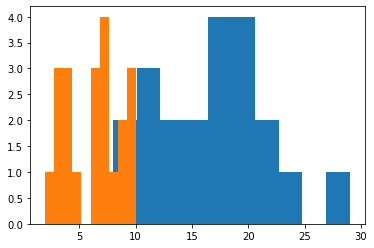

In [311]:
plt.hist(DeliveryTime.deliverytime)
plt.hist(DeliveryTime.sortingtime)

{'whiskers': [<matplotlib.lines.Line2D at 0x236fc89fd30>,
 'caps': [<matplotlib.lines.Line2D at 0x236fc8b2490>,
 'boxes': [<matplotlib.lines.Line2D at 0x236fc89f790>],
 'medians': [<matplotlib.lines.Line2D at 0x236fc8b2790>],
 'fliers': [<matplotlib.lines.Line2D at 0x236fc8bc1f0>],
 'means': []}

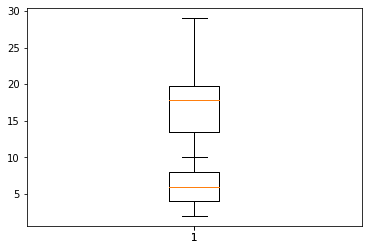

In [312]:

plt.boxplot(DeliveryTime.deliverytime,0,"rs",1)
plt.boxplot(DeliveryTime.sortingtime)

Text(0, 0.5, 'Sorting Time')

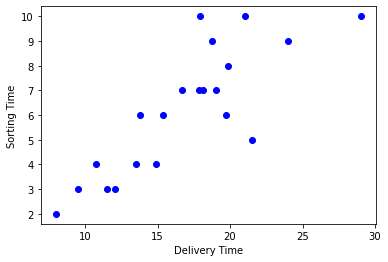

In [313]:
plt.plot(DeliveryTime.deliverytime,DeliveryTime.sortingtime,"bo");
plt.xlabel("Delivery Time");plt.ylabel("Sorting Time")


In [314]:
DeliveryTime.sortingtime.corr(DeliveryTime.deliverytime) # # correlation value between X and Y
np.corrcoef(DeliveryTime.sortingtime,DeliveryTime.deliverytime)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [315]:
# For preparing linear regression model we need to import the statsmodels.formula.api
# MODEL BUILDING

model=smf.ols("sortingtime ~ deliverytime",data=DeliveryTime).fit()

In [316]:
# For getting coefficients of the varibles used in equation
# MODEL TESTING

model.params

Intercept      -0.756673
deliverytime    0.413744
dtype: float64

In [317]:
# P-values for the variables and R-squared value for prepared model
model.summary()

model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.130058,1.616712
deliverytime,0.278169,0.549318


In [318]:
pred = model.predict(DeliveryTime.iloc[:,0]) # Predicted values of Sorting Time using the model

0.8259972607955327

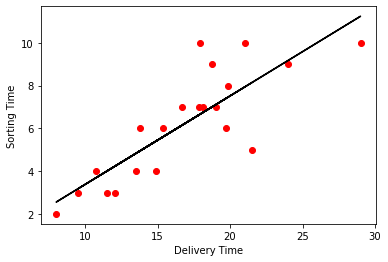

In [319]:
# Visualization of regresion line over the scatter plot of Delivery Time and Sorting Time
# For visualization we need to import matplotlib.pyplot

plt.scatter(x=DeliveryTime['deliverytime'],y=DeliveryTime['sortingtime'],color='red');
plt.plot(DeliveryTime['deliverytime'],pred,color='black');
plt.xlabel('Delivery Time');plt.ylabel('Sorting Time')

pred.corr(DeliveryTime.sortingtime) # 

                              0         1
Intercept            -20.369797 -4.628668
np.log(deliverytime)   3.916690  9.554407


Text(0, 0.5, 'Sorting Time')

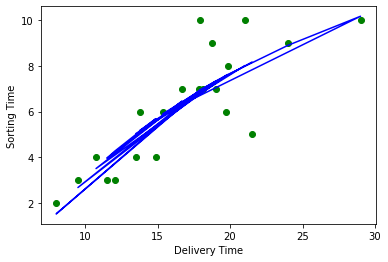

In [320]:
# LOG
# Transforming variables for accuracy
model2 = smf.ols('sortingtime~np.log(deliverytime)',data=DeliveryTime).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(DeliveryTime['deliverytime']))
pred2.corr(DeliveryTime.sortingtime)

pred2
plt.scatter(x=DeliveryTime['deliverytime'],y=DeliveryTime['sortingtime'],color='green');
plt.plot(DeliveryTime['deliverytime'],pred2,color='blue');
plt.xlabel('Delivery Time');plt.ylabel('Sorting Time')

                     0         1
Intercept    -0.147491  1.021964
deliverytime  0.043499  0.110302


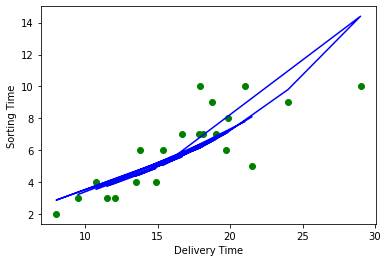

In [321]:
# LOG
# Exponential transformation
model3 = smf.ols('np.log(sortingtime)~deliverytime',data=DeliveryTime).fit()
model3.params
model3.summary()
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(DeliveryTime['deliverytime']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(Sorting Time) in preparing model so we need to convert it back
pred3
pred3.corr(DeliveryTime.sortingtime)
plt.scatter(x=DeliveryTime['deliverytime'],y=DeliveryTime['sortingtime'],color='green');
plt.plot(DeliveryTime.deliverytime,np.exp(pred_log),color='blue');
plt.xlabel('Delivery Time');plt.ylabel('Sorting Time')
resid_3 = pred3-DeliveryTime.sortingtime

In [322]:
# getting residuals of the entire data set
resid = model3.resid_pearson 
resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Actual')

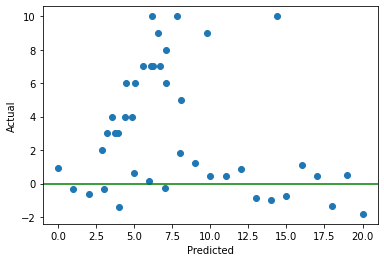

In [323]:

plt.plot(model3.resid_pearson,'o');
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

# Predicted vs actual values
plt.scatter(x=pred3,y=DeliveryTime.sortingtime);
plt.xlabel("Predicted");plt.ylabel("Actual")

In [341]:
# Quadratic model  (SQ)
DeliveryTime["deliverytime_Sq"] = DeliveryTime.deliverytime * DeliveryTime.deliverytime
model_quad = smf.ols("sortingtime ~ deliverytime + deliverytime_Sq",data=DeliveryTime).fit()
model_quad.params
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sortingtime   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.19e-05
Time:                        01:49:12   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.6401      2.864     -1.620      0.123     -10.657       1.377
deliverytime        0.8941      0.333      2.685      0.015       0.194       1.594
deliverytime_Sq    -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

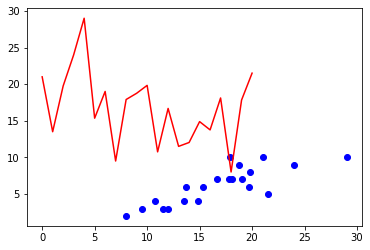

In [342]:

model_quad.conf_int(0.05) # 
plt.scatter(DeliveryTime.deliverytime,DeliveryTime.sortingtime,c="b");plt.plot(DeliveryTime.deliverytime,"r")

(array([1., 0., 2., 3., 1., 8., 3., 1., 1., 1.]),
 array([-2.2945037 , -1.85428624, -1.41406878, -0.97385132, -0.53363387,
        -0.09341641,  0.34680105,  0.78701851,  1.22723596,  1.66745342,
         2.10767088]),
 <BarContainer object of 10 artists>)

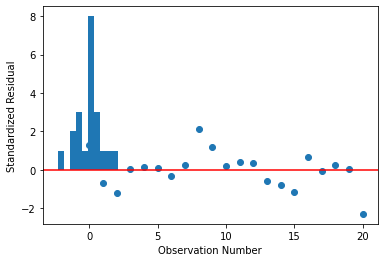

In [343]:

plt.scatter(np.arange(21),model_quad.resid_pearson);
plt.axhline(y=0,color='red');
plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

plt.hist(model_quad.resid_pearson) # histogram for residual values 

-0.7566733660351286

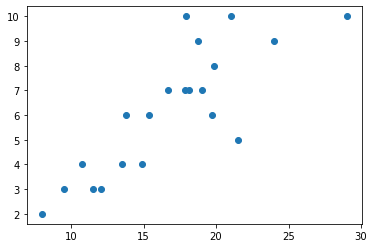

In [344]:
####### Implementing the Linear Regression model from sklearn library

plt.scatter(DeliveryTime.deliverytime,DeliveryTime.sortingtime)
model1 = LinearRegression()
model1.fit(DeliveryTime.deliverytime.values.reshape(-1,1),DeliveryTime.sortingtime)
pred1 = model1.predict(DeliveryTime.deliverytime.values.reshape(-1,1))

# Adjusted R-Squared value
model1.score(DeliveryTime.deliverytime.values.reshape(-1,1),DeliveryTime.sortingtime)# 
rmse1 = np.sqrt(np.mean((pred1-DeliveryTime.sortingtime)**2)) #
model1.coef_
model1.intercept_

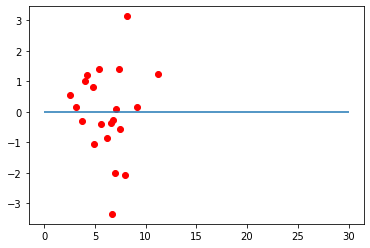

In [345]:
#### Residuals Vs Fitted values

plt.scatter(pred1,(pred1-DeliveryTime.sortingtime),c="r")
plt.hlines(y=0,xmin=0,xmax=30) 

(array([1., 1., 1., 2., 5., 3., 3., 4., 0., 1.]),
 array([-3.35066242, -2.70171472, -2.05276701, -1.40381931, -0.7548716 ,
        -0.10592389,  0.54302381,  1.19197152,  1.84091922,  2.48986693,
         3.13881464]),
 <BarContainer object of 10 artists>)

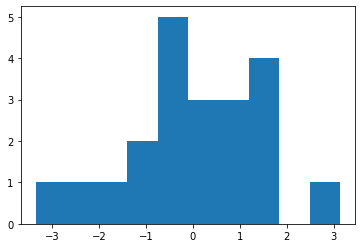

In [346]:
# checking normal distribution for residual
plt.hist(pred1-DeliveryTime.sortingtime)

In [327]:
### Fitting Quadratic Regression 
# (SQRT)
DeliveryTime["deliverytime_sqrd"] = DeliveryTime.deliverytime*DeliveryTime.deliverytime
model2 = LinearRegression()
model2.fit(X = DeliveryTime.iloc[:,[0,2]],y=DeliveryTime.sortingtime)
pred2 = model2.predict(DeliveryTime.iloc[:,[0,2]])

In [328]:
# Adjusted R-Squared value
model2.score(DeliveryTime.iloc[:,[0,2]],DeliveryTime.sortingtime)# 
rmse2 = np.sqrt(np.mean((pred2-DeliveryTime.sortingtime)**2)) # 
model2.coef_
model2.intercept_

-4.640095582578904

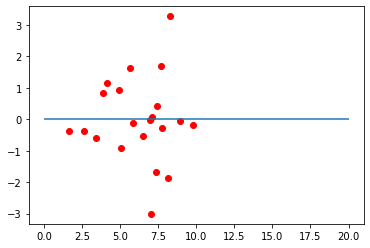

In [329]:
#### Residuals Vs Fitted values

plt.scatter(pred2,(pred2-DeliveryTime.sortingtime),c="r")
plt.hlines(y=0,xmin=0,xmax=20)  

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.00823901, -1.88216022, -1.67337684, -0.92631588, -0.60559149,
         -0.52332718, -0.37778585, -0.36071024, -0.27634935, -0.18794554,
         -0.13113929, -0.0421346 , -0.03669472,  0.07632571,  0.42135928,
          0.83725561,  0.94312634,  1.14094322,  1.64252516,  1.69533292,
          3.27490198])),
 (1.386905695609855, -1.4120728161620891e-15, 0.9740418427229265))

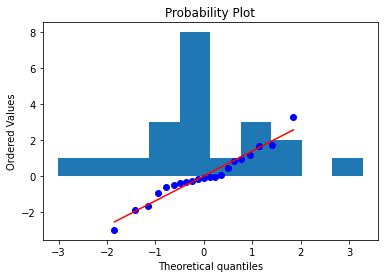

In [330]:
# Checking normal distribution
plt.hist(pred2-DeliveryTime.sortingtime)

st.probplot(pred2-DeliveryTime.sortingtime,dist="norm",plot=pylab)

In [331]:
# Let us prepare a model by applying transformation on dependent variable
DeliveryTime["sortingtime_sqrt"] = np.sqrt(DeliveryTime.sortingtime)

model3 = LinearRegression()
model3.fit(X = DeliveryTime.iloc[:,[0,2]],y=DeliveryTime.sortingtime_sqrt)
pred3 = model3.predict(DeliveryTime.iloc[:,[0,2]])

In [332]:
# Adjusted R-Squared value
model3.score(DeliveryTime.iloc[:,[0,2]],DeliveryTime.sortingtime_sqrt)# 
rmse3 = np.sqrt(np.mean(((pred3)**2-DeliveryTime.sortingtime)**2)) # 
model3.coef_
model3.intercept_

-0.1392288379030604

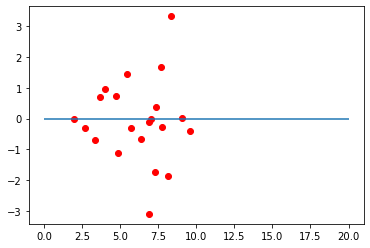

In [333]:
#### Residuals Vs Fitted values

plt.scatter((pred3)**2,((pred3)**2-DeliveryTime.sortingtime),c="r")
plt.hlines(y=0,xmin=0,xmax=20)  

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.09757539, -1.85078985, -1.72618228, -1.13153871, -0.68996514,
         -0.66287612, -0.40044779, -0.31853878, -0.31433374, -0.2850865 ,
         -0.12903228, -0.03055362, -0.00397624,  0.02421913,  0.37912592,
          0.6965875 ,  0.73870978,  0.97216019,  1.44861991,  1.68350897,
          3.31980117])),
 (1.38422662352949, -0.06562684984688795, 0.9725481989461069))

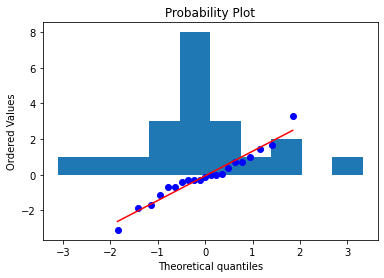

In [334]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-DeliveryTime.sortingtime)
st.probplot((pred3)**2-DeliveryTime.sortingtime,dist="norm",plot=pylab)

In [335]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = DeliveryTime.deliverytime.values.reshape(-1,1),y=DeliveryTime.sortingtime_sqrt)
pred4 = model4.predict(DeliveryTime.deliverytime.values.reshape(-1,1))

In [336]:
# Adjusted R-Squared value
model4.score(DeliveryTime.deliverytime.values.reshape(-1,1),DeliveryTime.sortingtime_sqrt)# 
rmse4 = np.sqrt(np.mean(((pred4)**2-DeliveryTime.sortingtime)**2)) # 
model4.coef_
model4.intercept_

0.9609339829284425

(array([1., 0., 2., 2., 5., 3., 4., 2., 1., 1.]),
 array([-3.59789074, -2.92821351, -2.25853629, -1.58885907, -0.91918185,
        -0.24950462,  0.4201726 ,  1.08984982,  1.75952704,  2.42920427,
         3.09888149]),
 <BarContainer object of 10 artists>)

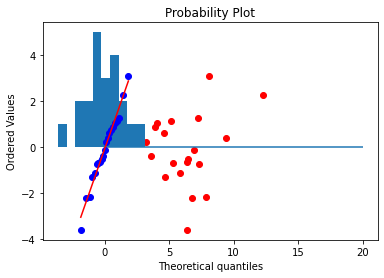

In [337]:
#### Residuals Vs Fitted values

plt.scatter((pred4)**2,((pred4)**2-DeliveryTime.sortingtime),c="r")
plt.hlines(y=0,xmin=0,xmax=20)  

st.probplot((pred4)**2-DeliveryTime.sortingtime,dist="norm",plot=pylab)

# Checking normal distribution for residuals 
plt.hist((pred4)**2-DeliveryTime.sortingtime)


In [338]:
# Prediction
# Predicted values of Salary using the model

new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [339]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [340]:
model1.predict(data_pred)

C:\Users\Shunottara\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1.7257884 , 2.55327566])